In [5]:
import os
import numpy as np
import wfdb
import matplotlib.pylab as plt

In [6]:
# setting
window_size=720  # 2 seconds
sample_rate = 360  # 360 Hz
 
# list
train_record_list = [
        '101', '106', '108', '109', '112', '115', '116', '118', '119', '122',
        '124', '201', '203', '205', '207', '208', '209', '215', '220', '223', '230'
        ]
test_record_list = [
        '100', '103', '105', '111', '113', '117', '121', '123', '200', '210',
        '212', '213', '214', '219', '221', '222', '228', '231', '232', '233', '234'
        ]
 
# annotation
labels = ['N', 'V']
valid_symbols = ['N', 'L', 'R', 'e', 'j', 'V', 'E']
label_map = {'N': 'N', 'L': 'N', 'R': 'N', 'e': 'N', 'j': 'N','V': 'V', 'E': 'V'}
 
def _load_data(base_record, channel=0):
    record_name = os.path.join(download_dir, str(base_record))
    # read dat file
    signals, fields = wfdb.rdsamp(record_name)
    assert fields['fs'] == sample_rate
    # read annotation file
    annotation = wfdb.rdann(record_name, 'atr')
    symbols = annotation.symbol
    positions = annotation.sample
    return signals[:, channel], symbols, positions
 
def _segment_data(signal, symbols, positions):
    X, y = [], []
    sig_len = len(signal)
    for i in range(len(symbols)):
        start = positions[i] - window_size // 2
        end = positions[i] + window_size // 2
        if symbols[i] in valid_symbols and start >= 0 and end <= sig_len:
            segment = signal[start:end]
            assert len(segment) == window_size, "Invalid length"
            X.append(segment)
            y.append(labels.index(label_map[symbols[i]]))
    return np.array(X), np.array(y)
 
def preprocess_dataset(record_list, mode, dataset_root): 
    Xs, ys = [], []
    save_dir = os.path.join(dataset_root) 
    for i in range(len(record_list)):
        signal, symbols, positions = _load_data(record_list[i])
        signal = (signal - np.mean(signal)) / np.std(signal)
        X, y = _segment_data(signal, symbols, positions)
        Xs.append(X)
        ys.append(y)
    os.makedirs(save_dir, exist_ok=True)
    np.save(os.path.join(save_dir, "x_"+str(mode)+".npy"), np.vstack(Xs))
    np.save(os.path.join(save_dir, "y_"+str(mode)+".npy"), np.concatenate(ys))

dataset_root = "data/mit"
download_dir = "data/mit-bih-arrhythmia-database-1.0.0/"

preprocess_dataset(train_record_list, "train", dataset_root) 
preprocess_dataset(test_record_list, "test", dataset_root) 

In [7]:
test = np.load("data/mit/x_test.npy")

In [10]:
test[0]

array([ 0.83488281,  0.80900283,  0.75724288,  0.78312285,  0.75724288,
        0.67960294,  0.65372296,  0.62784298,  0.70548292,  0.78312285,
        0.67960294,  0.65372296,  0.601963  ,  0.65372296,  0.78312285,
        0.88664277,  0.78312285,  0.601963  ,  0.52432307,  0.3690432 ,
        0.42080316,  0.31728324,  0.29140326,  0.23964331,  0.16200337,
        0.16200337,  0.16200337,  0.21376333,  0.26552328,  0.21376333,
        0.16200337,  0.08436343,  0.08436343,  0.08436343,  0.08436343,
        0.11024341,  0.05848346,  0.0067235 ,  0.11024341,  0.16200337,
        0.16200337,  0.13612339,  0.11024341,  0.0067235 ,  0.08436343,
        0.03260348,  0.13612339,  0.08436343,  0.03260348, -0.04503646,
       -0.07091644, -0.14855637, -0.27795626, -0.40735616, -0.40735616,
       -0.51087607, -0.76967586, -0.92495573, -0.92495573, -0.61439599,
       -0.12267639,  0.44668313,  1.22308249,  2.20652167,  3.52640058,
        4.79451952,  5.62267884,  5.93323858,  5.5450389 ,  4.27

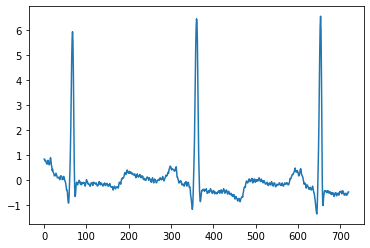

In [9]:
plt.plot(test[0])

In [12]:
test[0].shape

(720,)

In [13]:
y = np.load("data/mit/y_test.npy")

In [14]:
y[0]

0